## Analysing and exploring titanic data set

This notebook analyses and explores the [titanic data set](https://www.kaggle.com/c/titanic/data) from kaggle.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# enable inline plotting
%matplotlib inline 

---
#### Load data

In [62]:
# to-do: load. the datasets with pandas
df_test = pd.read_csv("data/test.csv", sep = ',')
df_train = pd.read_csv("data/train.csv", sep = ',')

Overview of the loaded data:

In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
 df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Display subsets of datasets:

In [16]:
# display the first three rows
df_test[:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [17]:
df_train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
# display the 'age' column
df_test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [19]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

---
#### Checking for and dropping NA
Important to avoid misinterpretation down the workflow.

In [20]:
df_train_cleaned = df_train.dropna(subset=['Age'])
df_test_cleaned = df_test.dropna(subset=['Age'])
df_train_cleaned['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

Turning columns to numpy arrays:

In [21]:
arr = df_train_cleaned['Age'].to_numpy(dtype='int')
# or via numpy
np.asarray(df_train_cleaned['Age'], dtype='int')

array([22, 38, 26, 35, 35, 54,  2, 27, 14,  4, 58, 20, 39, 14, 55,  2, 31,
       35, 34, 15, 28,  8, 38, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27,  3,
       19, 18,  7, 21, 49, 29, 65, 21, 28,  5, 11, 22, 38, 45,  4, 29, 19,
       17, 26, 32, 16, 21, 26, 32, 25,  0, 30, 22, 29, 28, 17, 33, 16, 23,
       24, 29, 20, 46, 26, 59, 71, 23, 34, 34, 28, 21, 33, 37, 28, 21, 38,
       47, 14, 22, 20, 17, 21, 70, 29, 24,  2, 21, 32, 32, 54, 12, 24, 45,
       33, 20, 47, 29, 25, 23, 19, 37, 16, 24, 22, 24, 19, 18, 19, 27,  9,
       36, 42, 51, 22, 55, 40, 51, 16, 30, 44, 40, 26, 17,  1,  9, 45, 28,
       61,  4,  1, 21, 56, 18, 50, 30, 36,  9,  1,  4, 45, 40, 36, 32, 19,
       19,  3, 44, 58, 42, 24, 28, 34, 45, 18,  2, 32, 26, 16, 40, 24, 35,
       22, 30, 31, 27, 42, 32, 30, 16, 27, 51, 38, 22, 19, 20, 18, 35, 29,
       59,  5, 24, 44,  8, 19, 33, 29, 22, 30, 44, 25, 24, 37, 54, 29, 62,
       30, 41, 29, 30, 35, 50,  3, 52, 40, 36, 16, 25, 58, 35, 25, 41, 37,
       63, 45,  7, 35, 65

Applying some stats:

In [22]:
print(df_train_cleaned['Age'].mean())
print(df_train_cleaned["Age"].std())

29.69911764705882
14.526497332334044


#### Concatenating dataframes

In [23]:
# explore the arguments
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.
    
    Allows optional set logic along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a V

In [24]:
# list of dataframes
df_list = [df_train, df_test]

# combine the two dataframes
df_combined = pd.concat(df_list, sort=True)
df_combined.describe()
df_combined.head()
# df_combined[df_combined['Name'] == 'Kelly, Mr. James'].head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


When worked with a df it may be useful to store it to disk:

In [25]:
# write the combined dataframe as a csv file
df_combined.to_csv('./data/combined.csv', index=False)

---
#### Quick and dirty plotting directly from dataframes

Histograms:

<Axes: >

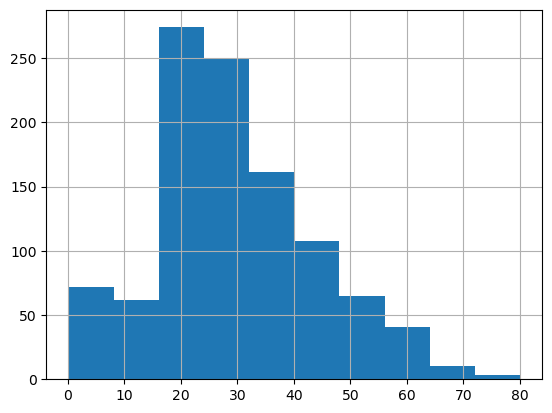

In [26]:
# Age
df_combined['Age'].hist()

<Axes: >

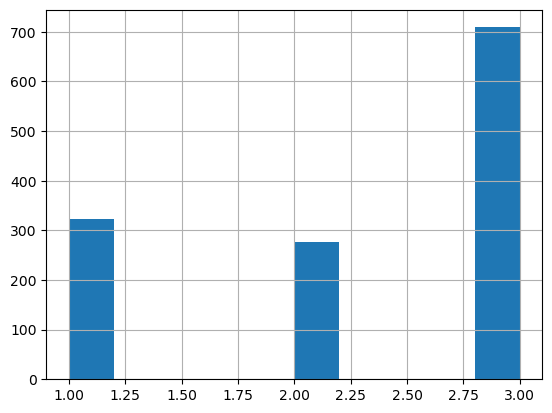

In [27]:
# pclass
df_combined['Pclass'].hist()

Plotting kernel density estimate (kde) for the pdf (probability distribution function).

<Axes: ylabel='Density'>

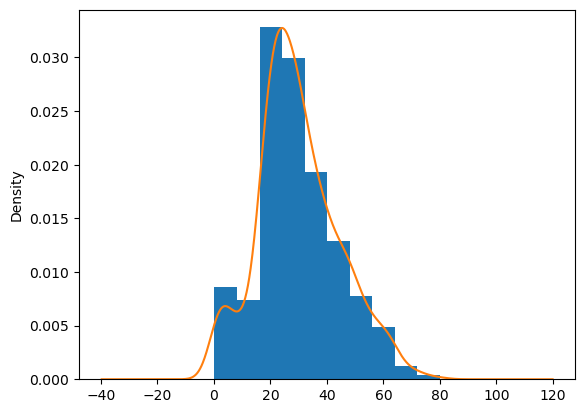

In [28]:
# to-do: make a normalized histogram and overplot the kde
df_combined['Age'].hist(density = True)
df_combined['Age'].plot.kde()

---
#### Beautify histogram for Pclass


<Axes: >

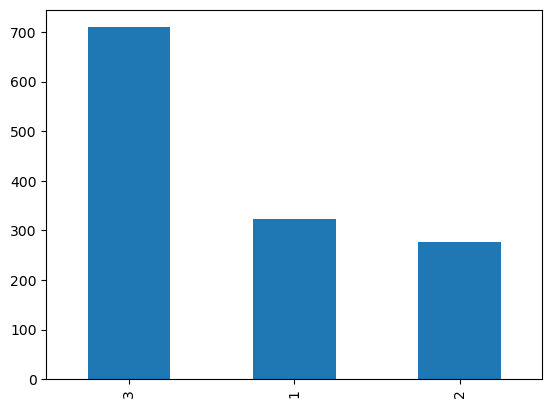

In [29]:
class_counts = df_combined['Pclass'].value_counts()
class_counts.plot(kind='bar')

Sort unordered columms (strings):

<Axes: >

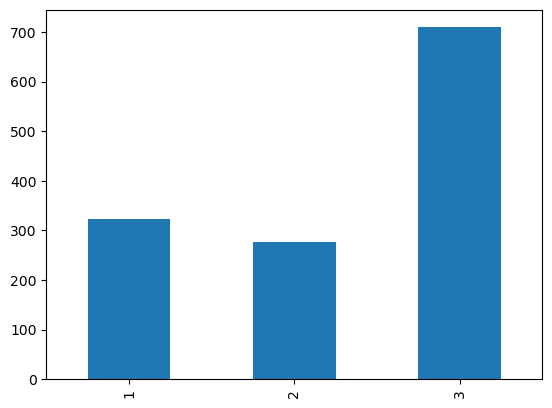

In [30]:
class_counts.sort_index().plot(kind='bar')

Using groupby to answer: What is the average age of those who survived?

In [31]:
survived = df_combined.groupby('Survived')
survived['Age'].mean()

Survived
0.0    30.626179
1.0    28.343690
Name: Age, dtype: float64

---
#### Realtionship of paid Fare, Age and whether person survived.

Text(0.5, 1.0, 'Exercise 2.3.3')

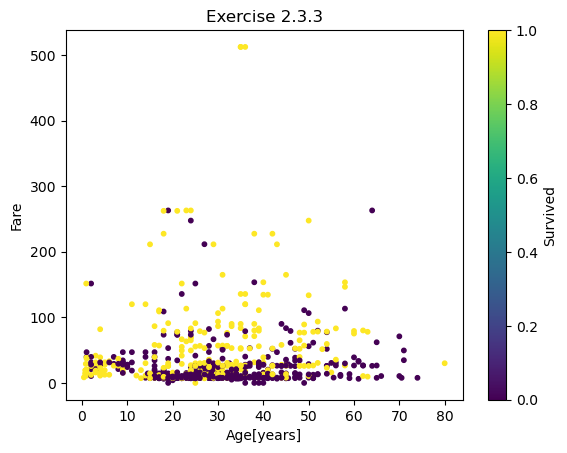

In [32]:
sct_plt = plt.scatter(df_combined['Age'],df_combined['Fare'], c= df_combined['Survived'], s= 10)
cbar = plt.colorbar(sct_plt)
cbar.set_label('Survived')
plt.xlabel('Age[years]')
plt.ylabel('Fare')
plt.title('Exercise 2.3.3')

<Axes: >

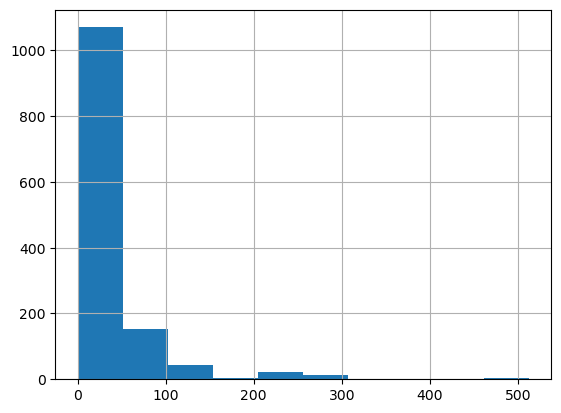

In [33]:
df_combined['Fare'].hist()

<Axes: >

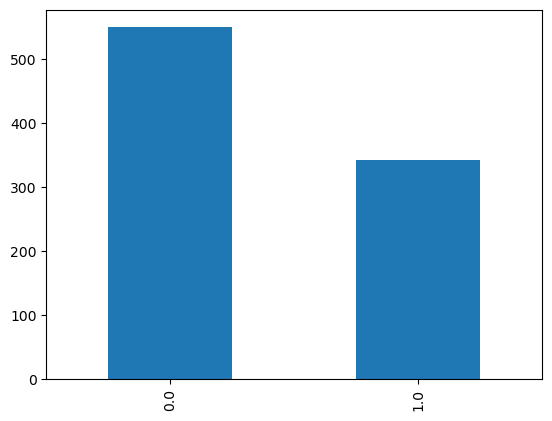

In [34]:
class_surv = df_combined['Survived'].value_counts()
class_surv.plot(kind = 'bar')

<Axes: >

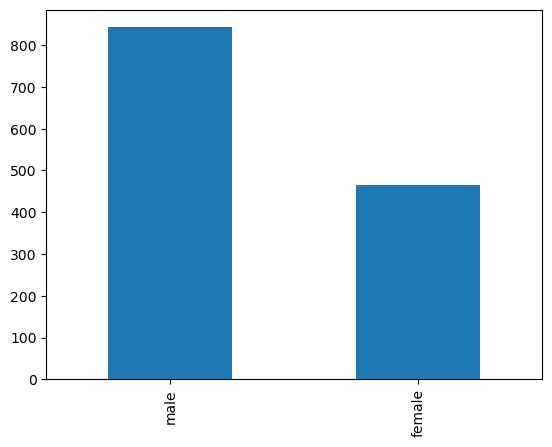

In [35]:
class_sex = df_combined['Sex'].value_counts()
class_sex.plot(kind = 'bar')

In [36]:

survivors = df_combined[df_combined['Survived'] == 1]
survivors[survivors['Age'] == max(survivors['Age'])]['Age']

630    80.0
Name: Age, dtype: float64

In [37]:
what fraction of men/women survived?
men = df_combined[df_combined['Sex'] == 'male']
women = df_combined[df_combined['Sex'] == 'female']
surv_men = men[men['Survived'] == 1]
surv_women = women[women['Survived'] == 1]
dead_men = men[men['Survived'] == 0]
dead_women = women[women['Survived'] == 0]
print('fraction of survived men:', (len(surv_men)/len(dead_men)))
print('fraction of survived women:', (len(surv_women)/len(dead_women)))
print('Please consider that not reported men and women were not included!')

fraction of survived men: 0.2329059829059829
fraction of survived women: 2.876543209876543
Please consider that not reported men and women were not included!


In [38]:
# to-do: what fraction of children survived?
# we consider everyone under 18 years of age a child in this code!
children = df_combined[df_combined['Age'] < 18]
children_surv = children[children['Survived'] == 1]
children_dead = children[children['Survived'] == 0]
print('fraction of survived children:', 1/(len(children_surv)/(len(children_dead))))
# print('please consider that not reported children were not included!')
# this is false: fraction goes from 0 to 1, look is up in the solutions

fraction of survived children: 0.8524590163934426


<Axes: title={'center': 'Survivors'}, ylabel='Density'>

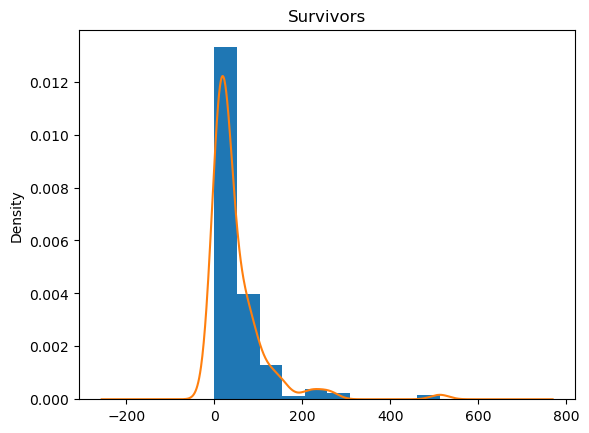

In [39]:
# to-do: Take a look at the normalized histograms!
survivors = df_combined[df_combined['Survived'] == 1]
dead = df_combined[df_combined['Survived'] == 0]
survivors['Fare'].hist(density = True)
plt.title('Survivors')
survivors['Fare'].plot.kde()

<Axes: title={'center': 'Dead'}, ylabel='Density'>

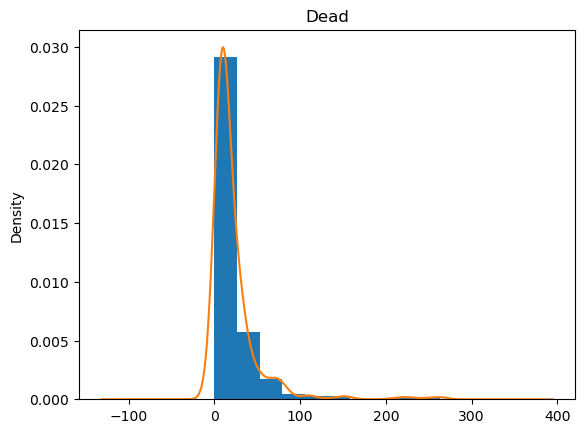

In [40]:
dead['Fare'].hist(density = True)
plt.title('Dead')
dead['Fare'].plot.kde()

---
#### Correlation between fare and survival:
Where people who paid more for the travel more likely to survive?

In [42]:
df_combined.groupby('Survived')["Fare"].mean()

Survived
0.0    22.117887
1.0    48.395408
Name: Fare, dtype: float64

##### Use a t-test
* **Independent Samples T-Test:** Used when you have two separate groups, and you want to compare the means of a single variable between these groups.
* **Paired Samples T-Test:** Used when you have two related groups (e.g., before and after measurements) and you want to compare the means of the paired data
* **One-Sample T-Test:** Used when you want to compare the mean of a single sample to a known population mean or a hypothesized value.

In [58]:
import scipy.stats as stats

# Choose two sided t-test

# Assuming df_combined is your DataFrame
# Separate "Fare" data based on "Survived" categories
fare_survived = df_combined[df_combined["Survived"] == 1]["Fare"].to_numpy()
fare_not_survived = df_combined[df_combined["Survived"] == 0]["Fare"].to_numpy()

# Perform independent t-test
t_statistic, t_p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# Perform Mann-Whitney U test: doesn't rely on assumption of normality or equal variance.
mw_statistic, mw_p_value = stats.mannwhitneyu(fare_survived, fare_not_survived, alternative="two-sided")

alpha = 0.05

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", t_p_value)
if t_p_value < alpha:
    print("Reject the null hypothesis using t-test.")
else:
    print("Fail to reject the null hypothesis using t-test.")

print("\nMann-Whitney U Test Results:")
print("Statistic:", mw_statistic)
print("P-Value:", mw_p_value)
if mw_p_value < alpha:
    print("Reject the null hypothesis using Mann-Whitney U test.")
else:
    print("Fail to reject the null hypothesis using Mann-Whitney U test.")


T-Test Results:
T-Statistic: 6.839099259085254
P-Value: 2.6993323503141236e-11
Reject the null hypothesis using t-test.

Mann-Whitney U Test Results:
Statistic: 129951.5
P-Value: 4.553477179250237e-22
Reject the null hypothesis using Mann-Whitney U test.


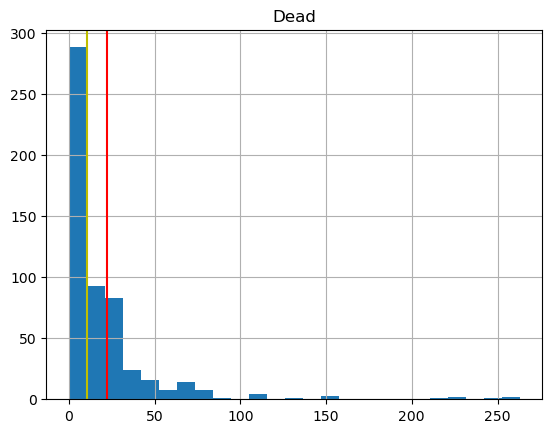

In [60]:
survived = df_combined.groupby("Survived")
dead = df_combined[df_combined['Survived'] == 0]
dead['Fare'].hist(bins = 25)
plt.title('Dead')
plt.axvline(survived['Fare'].mean()[0], color = 'r')
plt.axvline(survived['Fare'].median()[0], color = 'y')

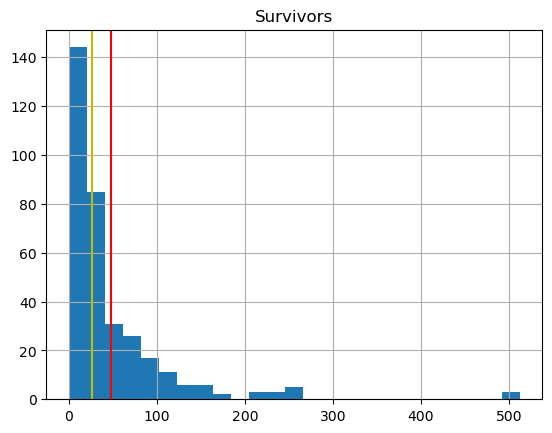

In [61]:
survivors = df_combined[df_combined['Survived'] == 1]
survivors['Fare'].hist(bins = 25)
plt.title('Survivors')
plt.axvline(survived['Fare'].mean()[1], color = 'r')
plt.axvline(survived['Fare'].median()[1], color = 'y')

From the t-test and the two visualisations we can state that the alternative hypothesis applies. Thus, people who paid higher faires where more likely to survive. Accroding to the t-test statistic, which takes into account variability and means of the data, paying around 7 dollars more mean higher chance of survival. Furthermore, the small p-value indicates that the probality is approx. 10e-22 that the null-hyptheis would apply.